# Crop Recommendation System

In [2]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import Data

In [3]:
df = pd.read_csv("Crop_recommendation.csv")

## Basic EDA

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
df.size

17600

In [7]:
df.shape

(2200, 8)

In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [11]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

## Visualization

### Heatmap

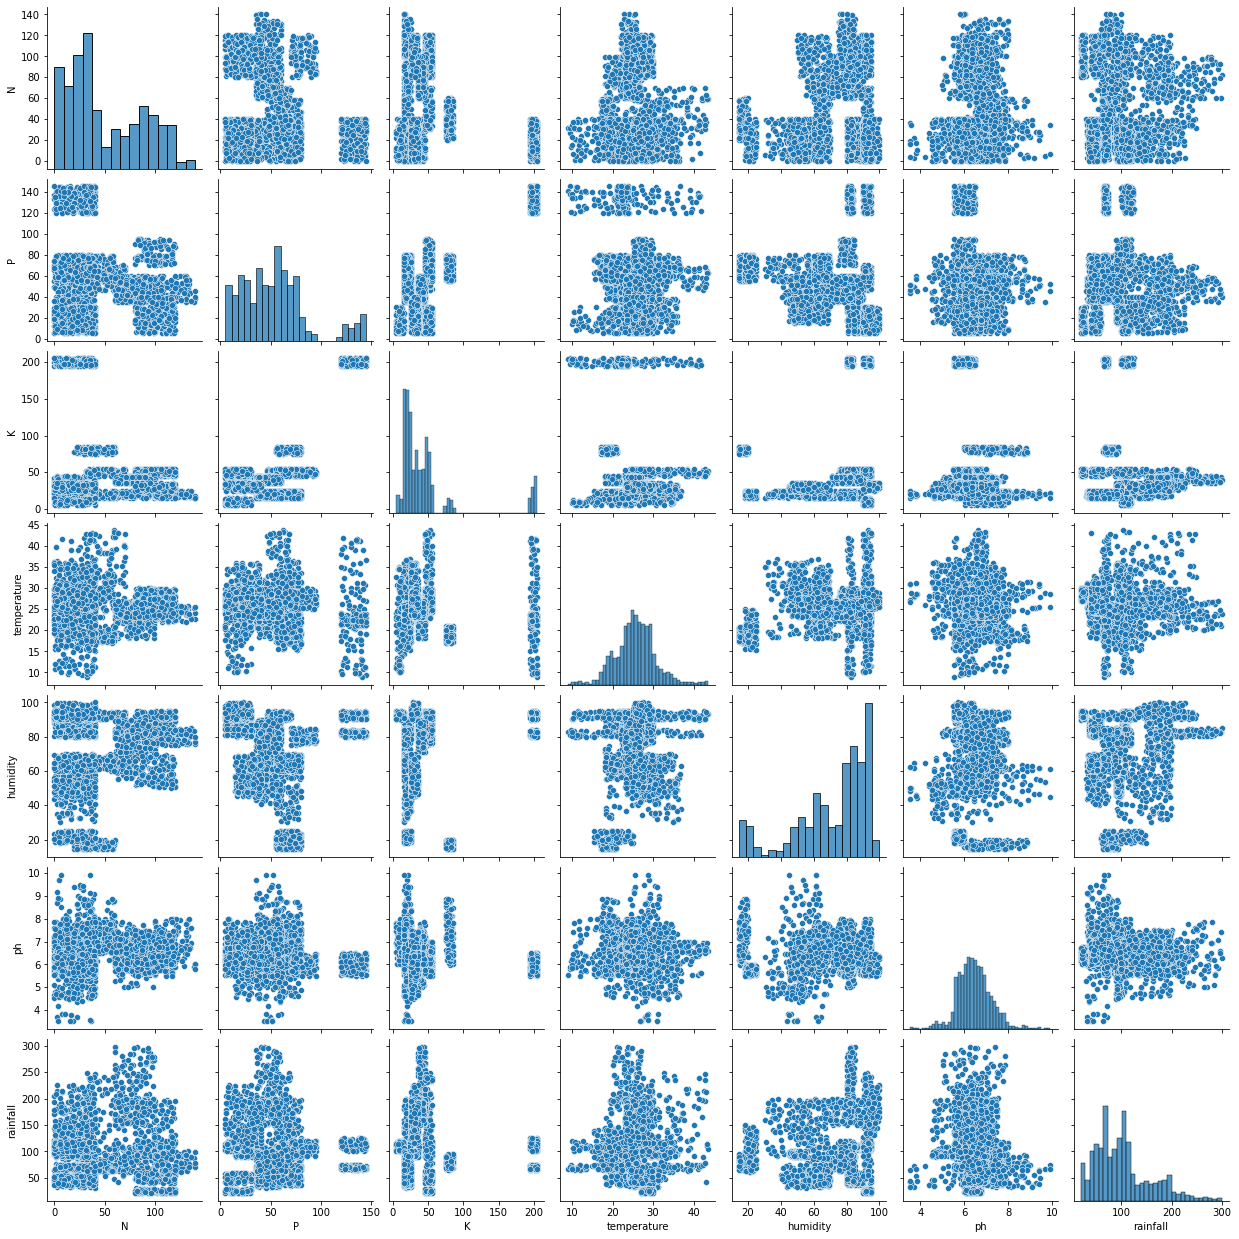

In [12]:
sns.pairplot(df)

<AxesSubplot:>

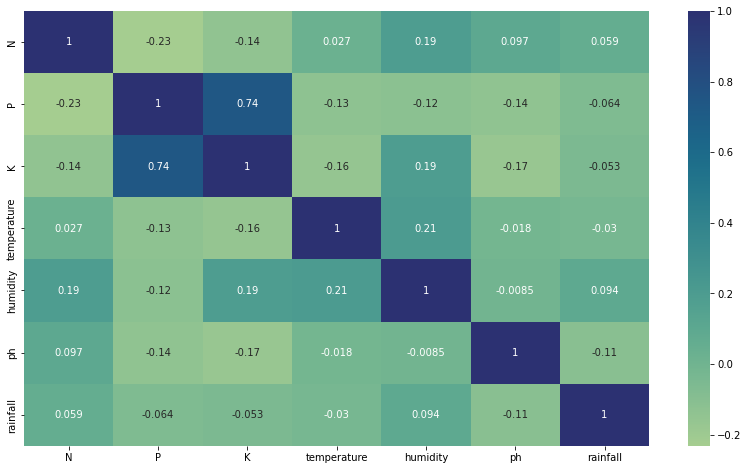

In [13]:
figure = plt.figure(figsize=(14, 8))
sns.heatmap(df.drop(columns = 'label').corr(),annot=True, cmap="crest")

In [14]:
label_groupby = df.groupby('label').mean().reset_index()
label_groupby

,label,N,P,K,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


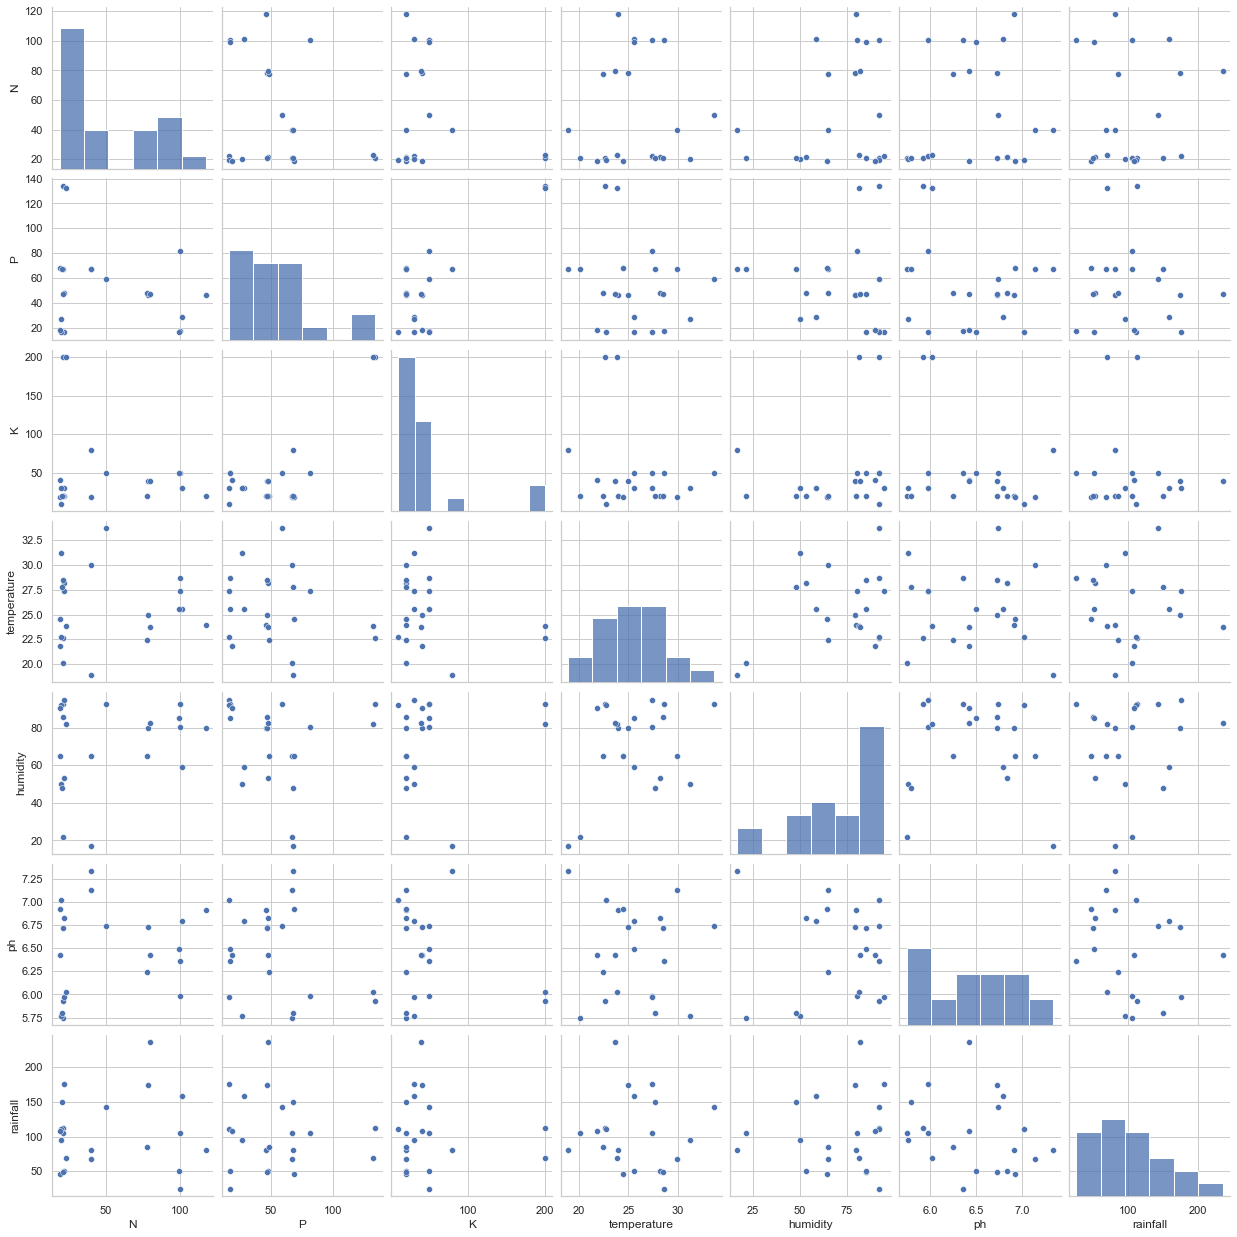

In [39]:
sns.pairplot(label_groupby)

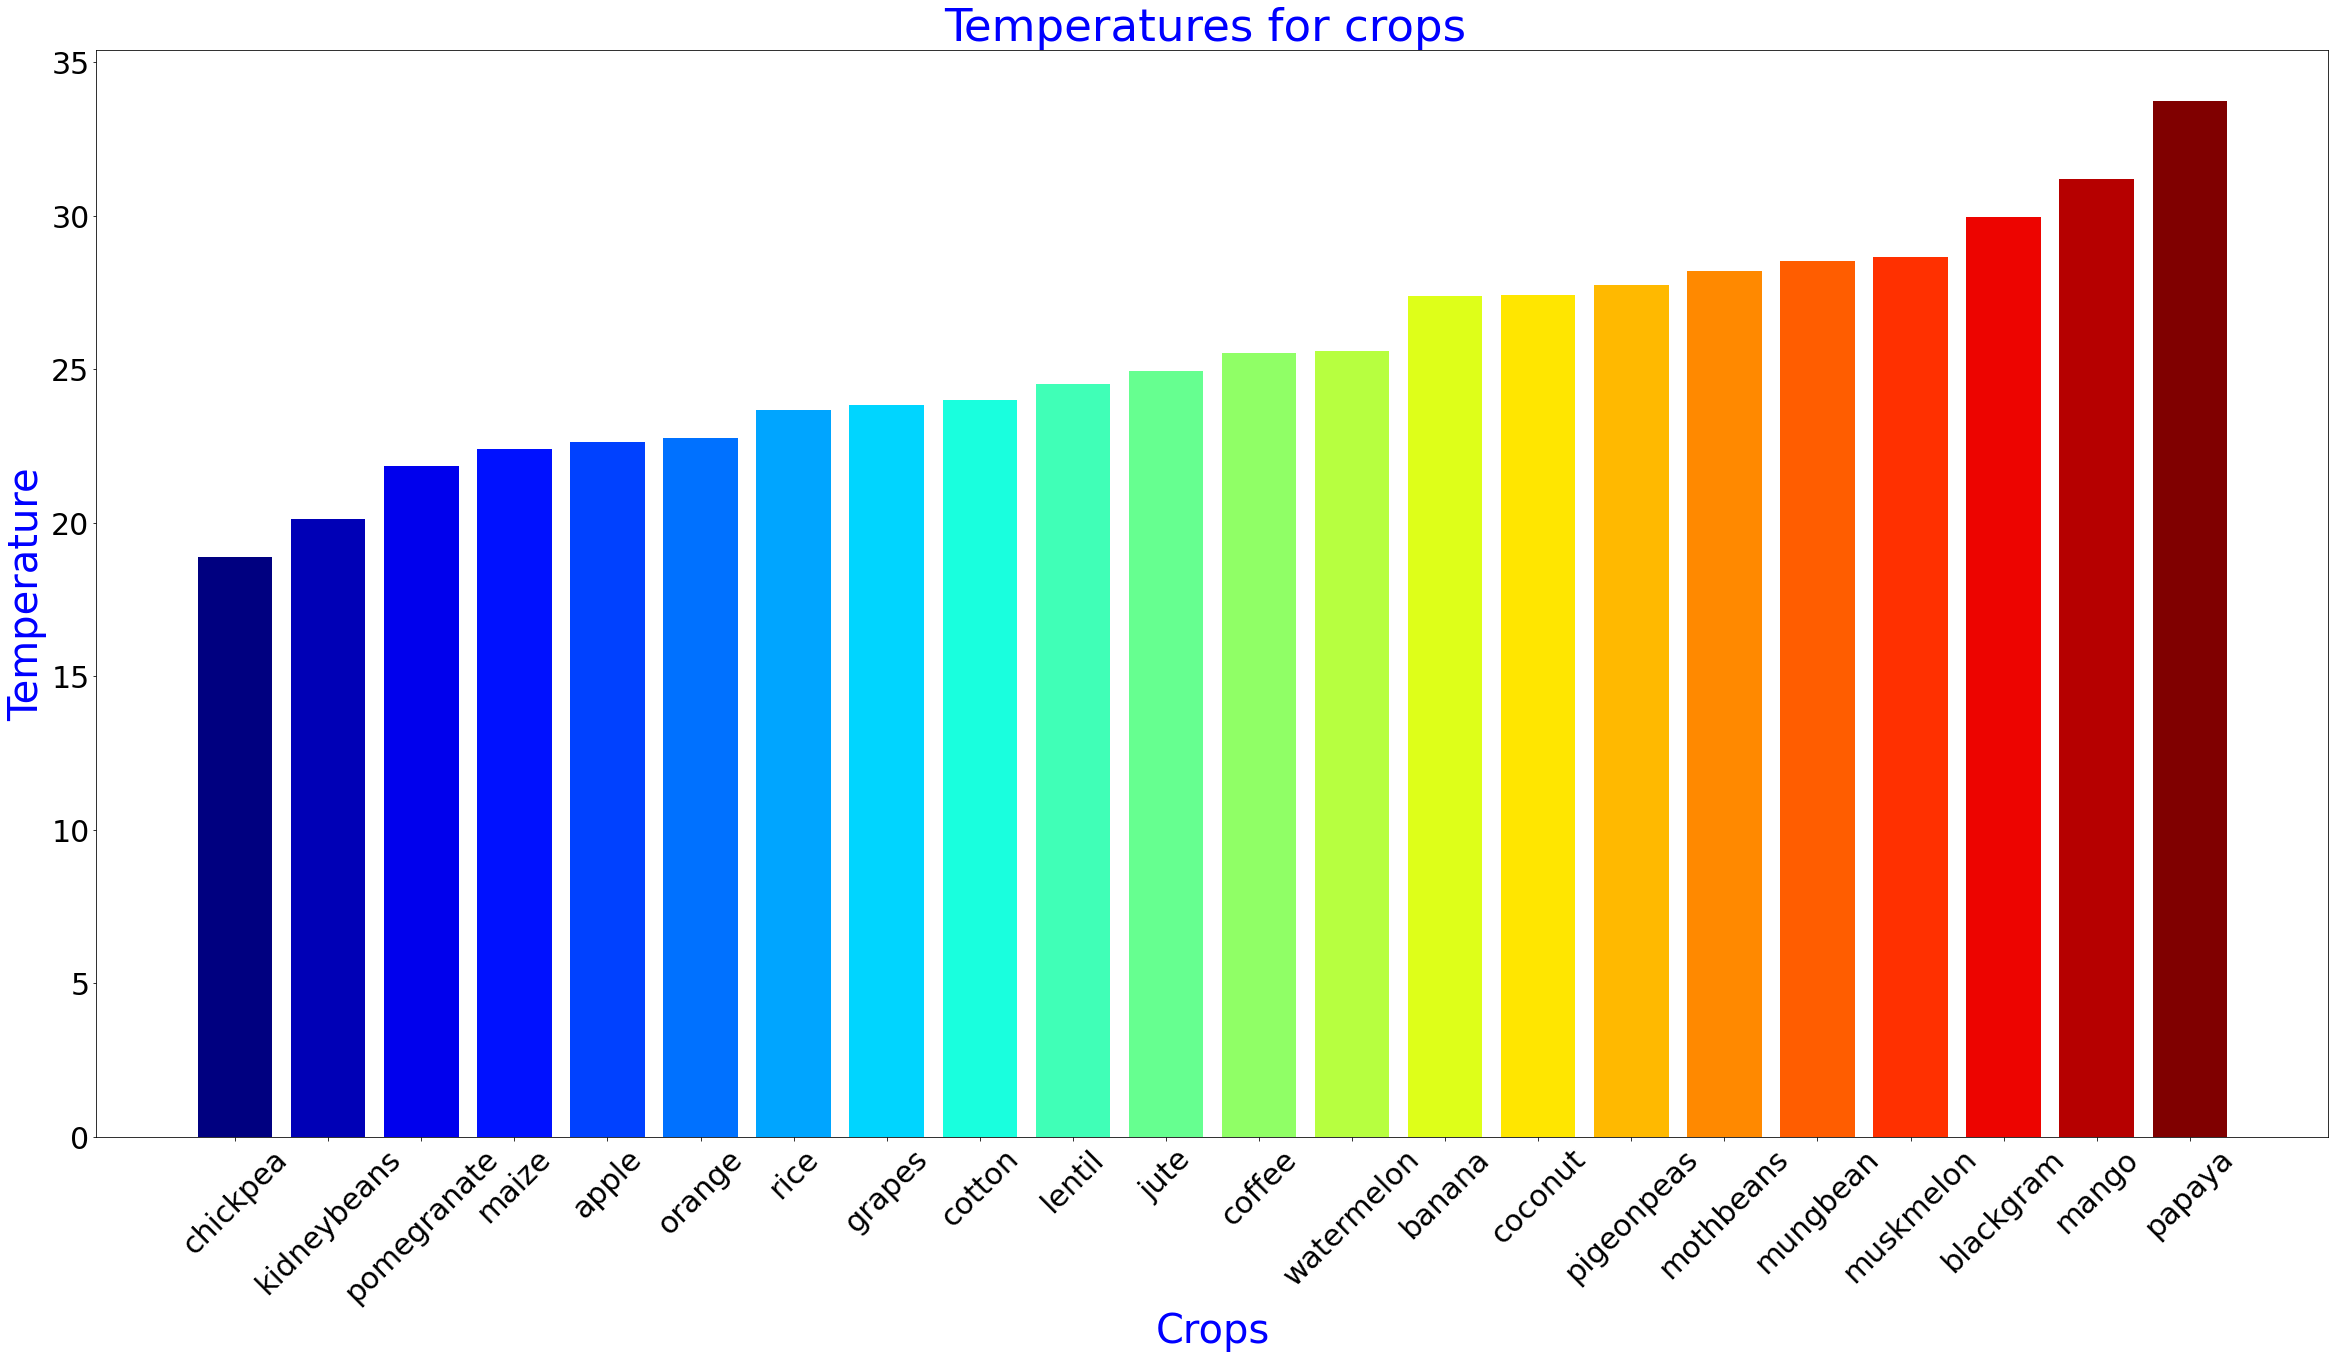

In [15]:
fig = plt.figure(figsize = (40, 20))

crop_temp = label_groupby.sort_values('temperature', ascending=True)


plt.bar(crop_temp['label'], crop_temp['temperature'], color =plt.cm.jet(np.linspace(0, 1, len(label_groupby['label']))), 
        width = 0.8
       )
plt.xticks(Fontsize=30,rotation=45) 
plt.yticks(Fontsize=30) 

plt.xlabel("Crops",Fontsize=40,color='blue')
plt.ylabel("Temperature",Fontsize=40,color='blue')
plt.title("Temperatures for crops ",Fontsize=45,color='blue')
plt.show()

In [16]:
label_groupby.iloc[:,0]

0           apple
1          banana
2       blackgram
3        chickpea
4         coconut
5          coffee
6          cotton
7          grapes
8            jute
9     kidneybeans
10         lentil
11          maize
12          mango
13      mothbeans
14       mungbean
15      muskmelon
16         orange
17         papaya
18     pigeonpeas
19    pomegranate
20           rice
21     watermelon
Name: label, dtype: object

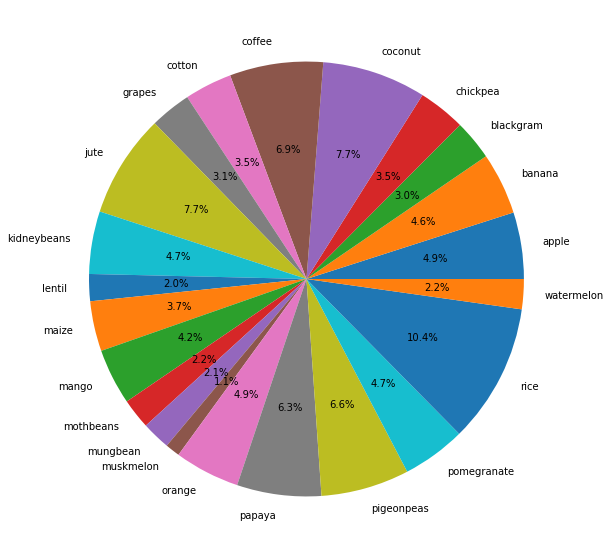

In [17]:
plt.figure(figsize=(10,10))
a= label_groupby["label"]
b = label_groupby["rainfall"]
plt.pie(b,labels=a,autopct='%1.1f%%')
plt.show()

## Top five Crops based on features

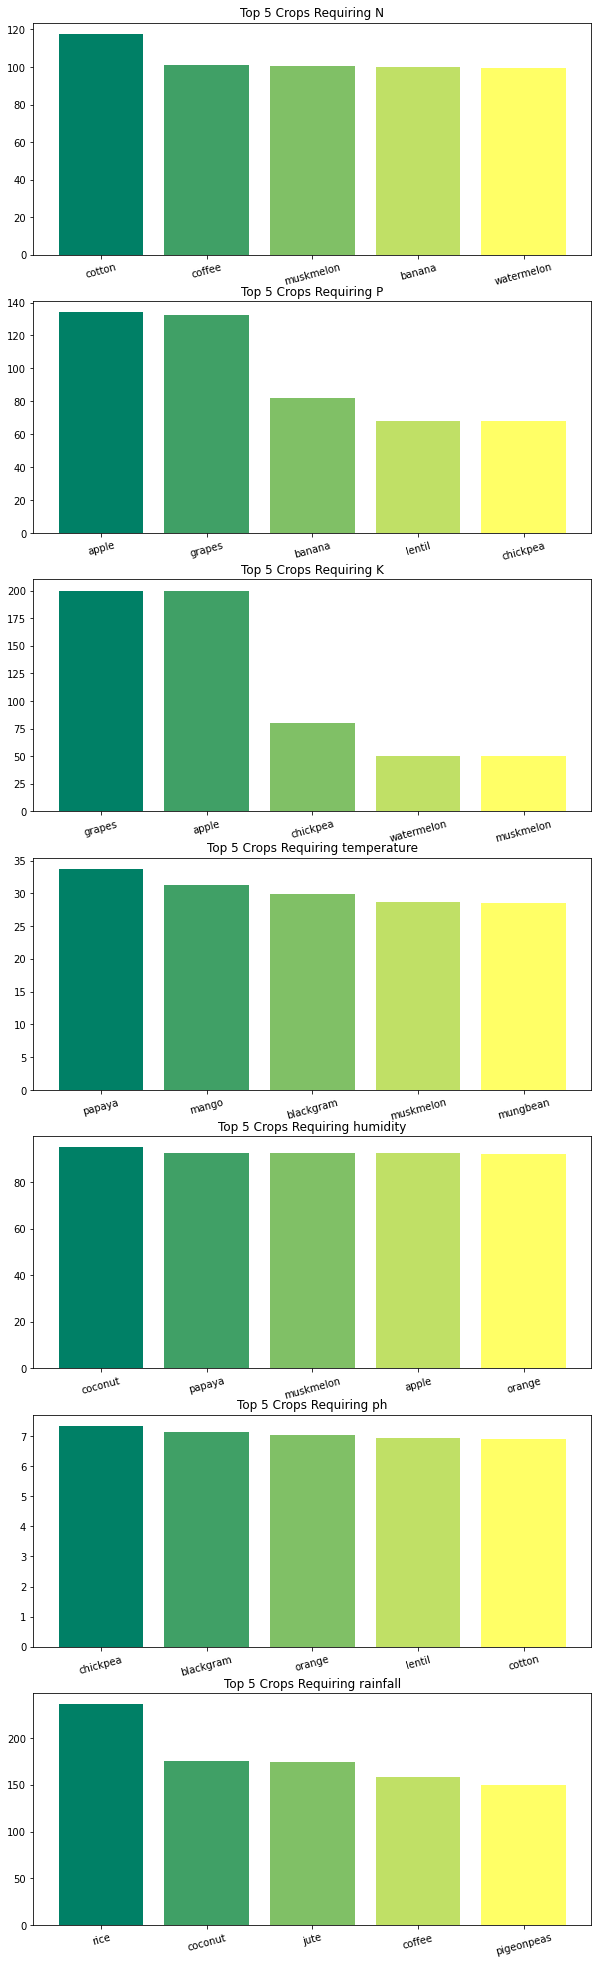

In [18]:
feature_columns = label_groupby.columns[1:]

num_rows = len(feature_columns)
num_cols = 1

colors = plt.cm.summer(np.linspace(0, 1, 5))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))

for i, feature in enumerate(feature_columns):
    
    top_5_crops = label_groupby.sort_values(by=feature, ascending=False)[:5]

    if num_rows > 1:
        ax = axes[i]
        
    else:
        ax = axes
    
    ax.bar(top_5_crops['label'], top_5_crops[feature], color = colors)
    ax.tick_params(axis='x', rotation=15)
    ax.set_title(f'Top 5 Crops Requiring {feature}')


## Bottom five Crops based on features

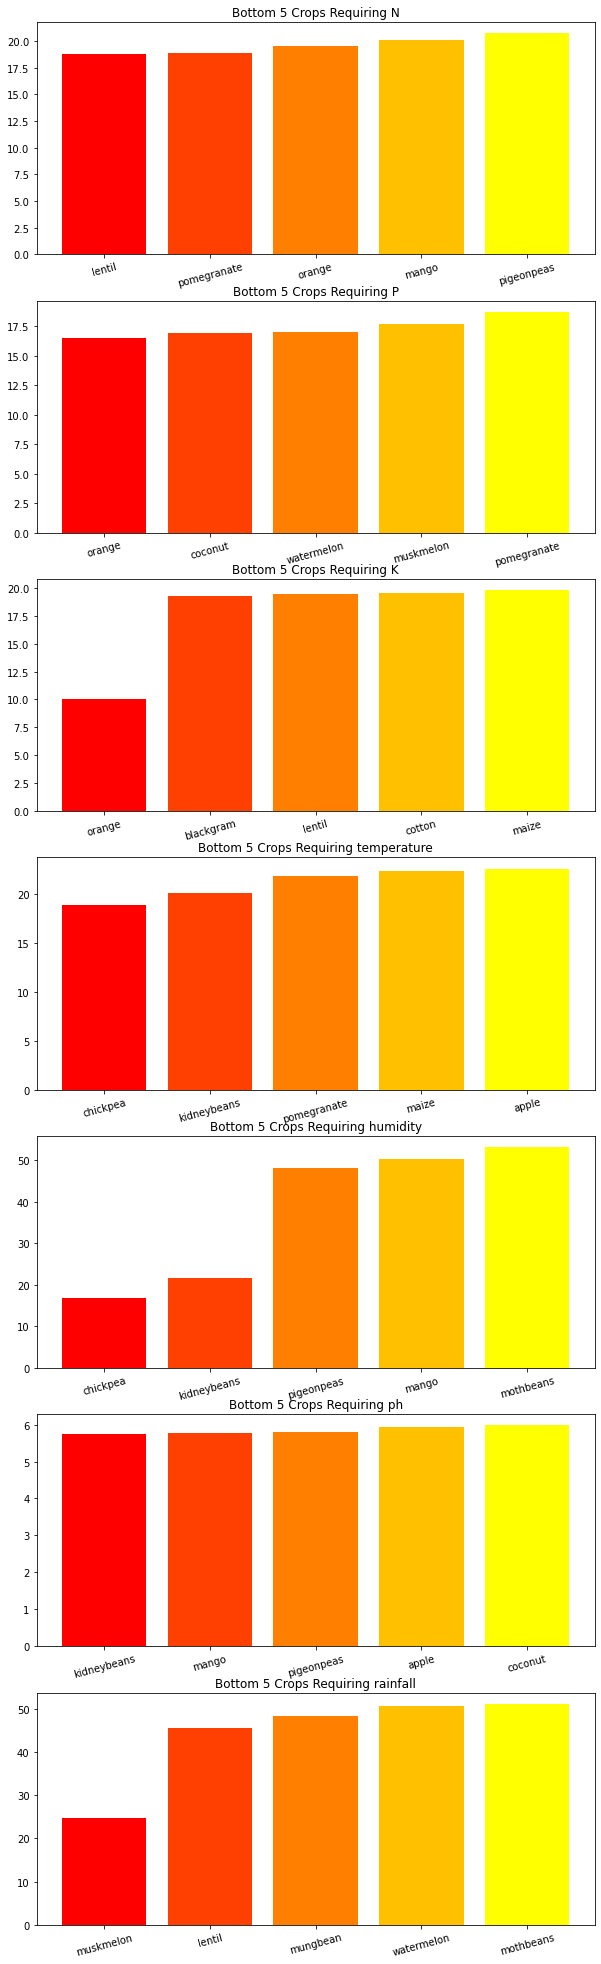

In [19]:
feature_columns = label_groupby.columns[1:]

num_rows = len(feature_columns)
num_cols = 1  

colors = plt.cm.autumn(np.linspace(0, 1, 5))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))

for i, feature in enumerate(feature_columns):
    
    bottom_5_crops = label_groupby.sort_values(by=feature, ascending=True)[:5]

    if num_rows > 1:
        ax = axes[i]
        
    else:
        ax = axes
    
    ax.bar(bottom_5_crops['label'], bottom_5_crops[feature], color = colors)
    ax.tick_params(axis='x', rotation=15)
    ax.set_title(f'Bottom 5 Crops Requiring {feature}')

# Outliers before cleaning

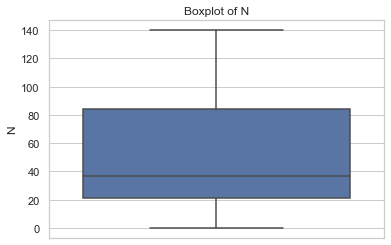

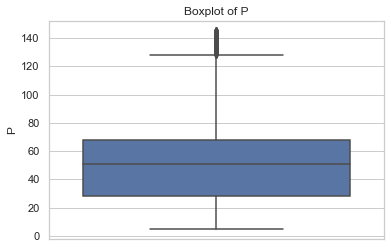

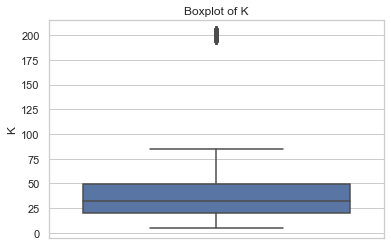

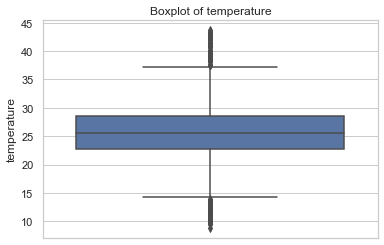

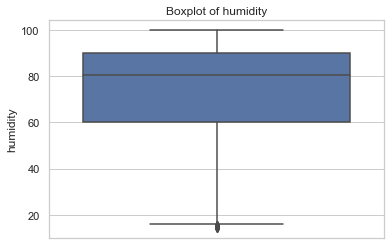

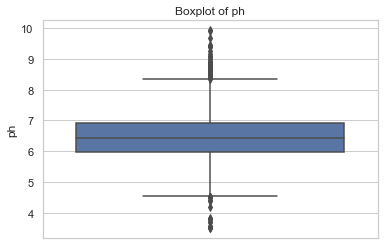

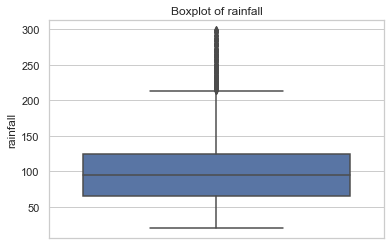

In [20]:
sns.set(style="whitegrid")

# Iterate through each column and plot a boxplot on separate canvases
for column in df.columns[:-1]:
    plt.figure()  # Create a new canvas for each boxplot
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

## Removing Outliers

In [21]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outlier detection
    lower_bound = Q1 - 1.5* IQR
    upper_bound = Q3 + 1.5* IQR
    
    ls = df.index[(df[ft]>upper_bound) | (df[ft]<lower_bound) ]
    
    return ls

In [22]:
index_list = []
feature_list = ['P','K','temperature','humidity','ph','rainfall']
for feature in feature_list:
    index_list.extend(outliers(df,feature))

In [23]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [24]:
df_cleaned = remove(df,index_list)

In [25]:
df_cleaned.shape

(1768, 8)

# After removing outliers

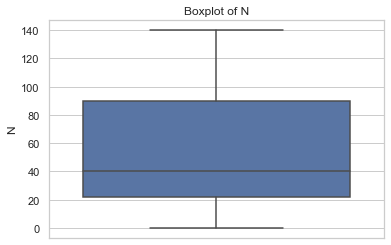

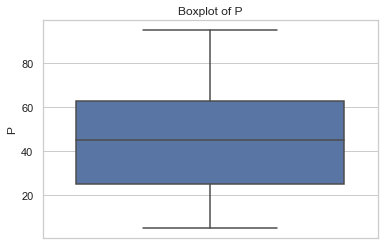

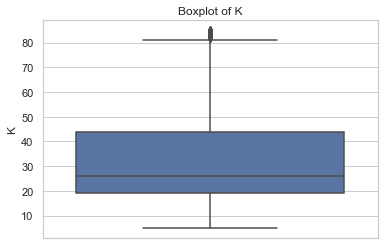

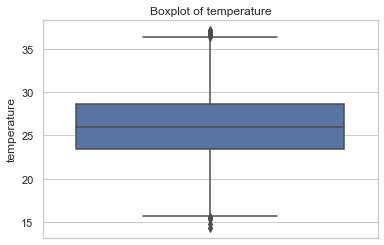

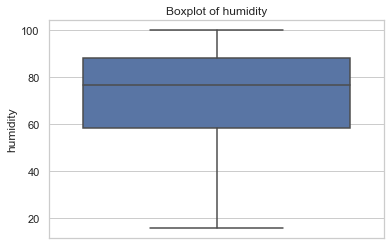

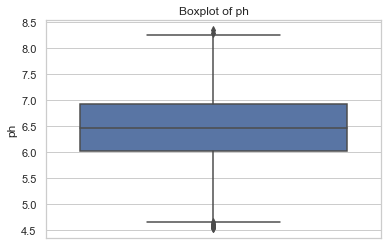

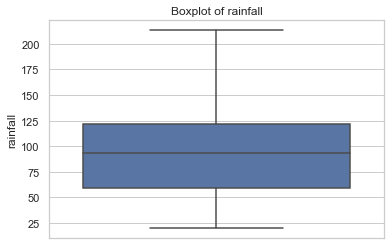

In [26]:
sns.set(style="whitegrid")

# Iterate through each column and plot a boxplot on separate canvases
for column in df_cleaned.columns[:-1]:
    plt.figure()  # Create a new canvas for each boxplot
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

### Seperating features and target label

In [27]:
features = df_cleaned[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df_cleaned['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df_cleaned['label']

In [28]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [29]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)

model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  97.17514124293785
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        13
   blackgram       0.83      1.00      0.90        19
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        23
      cotton       1.00      1.00      1.00        26
        jute       0.78      1.00      0.88        14
 kidneybeans       1.00      1.00      1.00        19
      lentil       0.91      1.00      0.95        20
       maize       1.00      0.85      0.92        20
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      0.57      0.73         7
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.00        25
      papaya       1.00      1.00      1.00         9
  pigeonpeas       1.00      1.00

# Guassian Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  99.43502824858757
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        13
   blackgram       1.00      1.00      1.00        19
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        23
      cotton       1.00      1.00      1.00        26
        jute       1.00      0.86      0.92        14
 kidneybeans       1.00      1.00      1.00        19
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      1.00      1.00         7
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.00        25
      papaya       1.00      1.00      1.00         9
  pigeonpeas       1.00      1.00  

# Support Vector Machine (SVM)

In [32]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  98.58757062146893
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        13
   blackgram       0.83      1.00      0.90        19
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        23
      cotton       1.00      1.00      1.00        26
        jute       0.93      1.00      0.97        14
 kidneybeans       1.00      1.00      1.00        19
      lentil       1.00      0.95      0.97        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      0.86      0.92         7
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.00        25
      papaya       1.00      1.00      1.00         9
  pigeonpeas       1.00      0.90      0.95

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  96.045197740113
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        13
   blackgram       0.85      0.89      0.87        19
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        23
      cotton       0.86      0.96      0.91        26
        jute       1.00      0.93      0.96        14
 kidneybeans       1.00      1.00      1.00        19
      lentil       0.94      0.85      0.89        20
       maize       0.89      0.80      0.84        20
       mango       1.00      1.00      1.00        13
   mothbeans       0.71      0.71      0.71         7
    mungbean       1.00      0.97      0.98        29
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.00        25
      papaya       1.00      1.00      1.00         9
  pigeonpeas       0.95      

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  100.0
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        13
   blackgram       1.00      1.00      1.00        19
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        23
      cotton       1.00      1.00      1.00        26
        jute       1.00      1.00      1.00        14
 kidneybeans       1.00      1.00      1.00        19
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      1.00      1.00         7
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.00        25
      papaya       1.00      1.00      1.00         9
  pigeonpeas       1.00      1.00      1.00        20
 p

## Accuracy Comparison

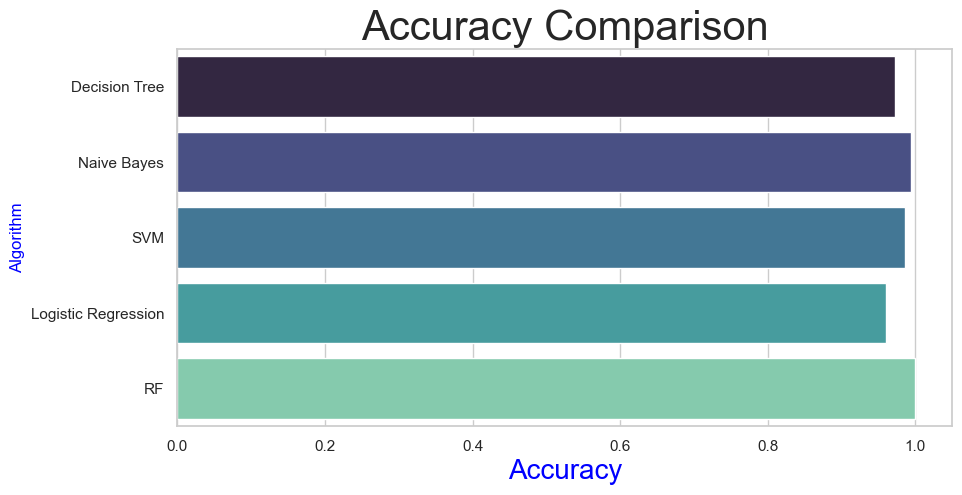

<Figure size 432x288 with 0 Axes>

In [35]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison', Fontsize=30 )
plt.xlabel('Accuracy', Fontsize=20,color='blue')
plt.ylabel('Algorithm',color='blue')
sns.barplot(x = acc,y = model,palette='mako')
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.show()
plt.savefig("accuracy.png")

In [36]:

accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', round(v*100,2))

Decision Tree --> 97.18
Naive Bayes --> 99.44
SVM --> 98.59
Logistic Regression --> 96.05
RF --> 100.0


## Making a prediction

In [37]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [38]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
